In [2]:
import numpy as np
import pandas as pd
import datetime
import operator
df = pd.read_csv('C:\\Vimal Anand\\loads.csv', parse_dates=["collection_date","delivery_date"])
df.head()

,collection_longitude,collection_latitude,collection_date,delivery_longitude,delivery_latitude,delivery_date,size,id
0,-2.214219,57.239806,2016-10-06 11:00:00,-2.080793,57.140803,2016-10-06 13:00:00,1.000000,1006262
1,-2.081943,57.127896,2017-01-15 08:30:00,-2.081300,57.143050,2017-01-15 14:00:00,0.166667,1019653
2,-2.081943,57.127896,2017-01-15 08:30:00,-2.081300,57.143050,2017-01-15 14:00:00,0.166667,1019653
3,-2.081943,57.127896,2017-01-15 08:30:00,-2.081300,57.143050,2017-01-15 14:00:00,0.166667,1019653
4,-2.081943,57.127896,2017-01-15 08:30:00,-2.081300,57.143050,2017-01-15 14:00:00,0.166667,1019653


In [104]:
df = df[df.collection_longitude < -1.5]
df = df[df.collection_longitude > -3.5]
df = df[df.collection_latitude < 60]
df = df[df.collection_latitude > 55]
# df = df[:10000]
df = df[df.collection_date > ('2015-10-06 11:00:00')]
X = np.array(list(zip(df['collection_longitude'], df['collection_latitude'])))

In [193]:
from sklearn.cluster import KMeans, MiniBatchKMeans
def k_means(X, n):
    # kmeans = KMeans(n_clusters=n)
    mbk = MiniBatchKMeans(n_clusters=n, batch_size=10000)
    # kmeans = kmeans.fit(X)
    mbk = mbk.fit(X)
    # labels = kmeans.predict(X)
    labels = mbk.predict(X)
    # C = kmeans.cluster_centers_
    C = mbk.cluster_centers_
    return C, mbk

centr, mb = k_means(X, 21)
d = {i: X[np.where(mb.labels_ == i)] for i in range(mb.n_clusters)}
d1 = {i: np.where(mb.labels_ == i)[0] for i in range(mb.n_clusters)}
# print(centr)
# print(d)
# print(d1)
import seaborn as sns
import matplotlib.pyplot as plt
k = d.keys()
v = list(d.values())
vids = list(d1.values())

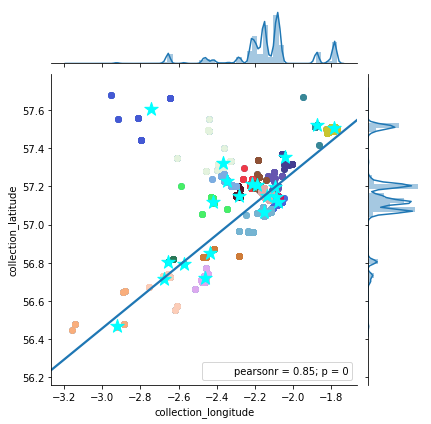

In [180]:
from random import randint
def ret_col():
    hello= ["1","2","3","4","5","6","7","8","9","a","b","c","e","d","f"]
    v="#"
    count=0
    for i in range(0,len(hello)):
        v=v+str(hello[randint(0,14)])
        count+=1
        if(count==6):
            #print(v)
            break
    return v

plt1 = sns.jointplot(x='collection_longitude', y='collection_latitude', data=df, kind='reg')
# col = ['yellow', 'green', 'red', 'blue', 'maroon', 'grey', 'black']
# col = ["#9b59b6", "#3498db", "#95a5a6", "#e74c3c", "#34495e", "#2ecc71", "#0000ff", 'yellow', 'green', 'red', 'blue', 'maroon', 'grey', 'black']
for i in range(0, len(v)):
    plt1.ax_joint.scatter(v[i][:, 0], v[i][:, 1], color = ret_col())
plt.scatter(centr[:, 0], centr[:, 1], marker='*', s=200, c='aqua')

In [194]:
date_time11 = []
date_time21 = []
date_time31 = []
geo_loc =[]
for i in range(0, len(vids)):
    date_time1 = {}
    date_time2 = {}
    date_time3 = {}
    geo_loc1 = []
   # print(len(vids))
    for j in range(0, len(vids[i])):
        date_time1.update({vids[i][j]: [df['collection_longitude'].iloc[vids[i][j]], df['collection_latitude'].iloc[vids[i][j]]]})
        date_time2.update({vids[i][j]: df['collection_date'].iloc[vids[i][j]]})
        date_time3.update({vids[i][j]: [df['delivery_date'].iloc[vids[i][j]], df['size'].iloc[vids[i][j]]]})
        geo_loc1.append(df['collection_longitude'].iloc[vids[i][j]])
        geo_loc1.append(df['collection_latitude'].iloc[vids[i][j]])
        geo_loc1.append(df['delivery_longitude'].iloc[vids[i][j]])
        geo_loc1.append(df['delivery_latitude'].iloc[vids[i][j]])
       # geo_loc1.append(df['collection_longitude'].iloc[vids[i][j]])
        #date_time1.append(df['collection_date'].iloc[vids[i][j]])
    date_time11.append(date_time1)
    date_time21.append(date_time2)
    date_time31.append(date_time3)
    geo_loc.append(geo_loc1)
# date_time
date_time_sorted1 = []
date_time_sorted2 = []
date_time_sorted3 = []
geo_loc_sorted=[]
for diction in date_time11:
    sorted_x = sorted(diction.items(), key=operator.itemgetter(1))
    date_time_sorted1.append(sorted_x)
for diction in date_time21:
    sorted_y = sorted(diction.items(), key=operator.itemgetter(1))
    date_time_sorted2.append(sorted_y)
for diction in date_time31:
    sorted_z = sorted(diction.items(), key=operator.itemgetter(1))
    date_time_sorted3.append(sorted_z)

In [195]:
c=[]
b=[]
for i in date_time_sorted3:
    e={}
    for j in i:
        key = j[1][0]
       # print(key)
        if key not in e:
               e[key]=[]
        e[key].append(j[1][1])
    c.append(e)
#c
for diction in c:
    sorted_x = sorted(diction.items(), key=operator.itemgetter(0))
    #print(len(sorted_x))
    b.append(sorted_x)
    
g=[]
for i in range(0,len(date_time_sorted3)):
    for j in range(0,len(b[i])):
        g.append(b[i][j][1])
#g
len(date_time_sorted3)
        


21

In [200]:
def bestFitDecreasing(values, maxValue):
    values = sorted(values, reverse=True)
    bins = []
    
    for item in values:
        # Try to fit item into a bin
        for bin in bins:
            if bin.sum + item <= maxValue:
                #print 'Adding', item, 'to', bin
                bin.append(item)
                break
        else:
            # item didn't fit into any bin, start a new bin
            #print 'Making new bin for', item
            bin = Bin()
            bin.append(item)
            bins.append(bin)
    
    return len(bins)    

n=0
for i in range(0,len(g)):
    aList= g[i]
    p=bestFitDecreasing(aList,1)
    n=n+p
n   

53581

In [88]:
import csv 
datacap=csv.reader('C:\\Vimal Anand\\loads.csv')

In [90]:
df2=df.id

In [93]:
ghj=df2.unique()

In [94]:
ghj

array([1006262, 1019653, 1017754, ..., 1102431, 1102673, 1103057],
      dtype=int64)

In [100]:
len(ghj)

18772

In [101]:
df2

0        1006262
1        1019653
2        1019653
3        1019653
4        1019653
5        1019653
6        1019653
7        1017754
8        1017570
9        1017570
10       1017570
11       1018877
12       1018877
13       1018877
14       1018877
15       1018877
16       1018877
17       1018877
18       1018877
19       1015611
20       1018877
21       1018877
22       1018877
23       1018877
24       1018877
25       1018877
26       1011036
27       1011036
28       1011036
29       1011036
          ...   
81779    1098033
81780    1098081
81781    1098173
81782    1098471
81783    1098599
81784    1098599
81785    1098599
81786    1098599
81787    1098633
81788    1098655
81789    1098857
81790    1098857
81791    1098857
81792    1098857
81793    1098857
81794    1099162
81795    1099472
81796    1099752
81797    1099885
81798    1100319
81799    1100556
81800    1100742
81801    1101086
81802    1101230
81803    1101652
81804    1101882
81805    1102204
81806    11024

In [175]:
date_time_sorted1[0][17247]

(7220, [-2.069031099999961, 57.1217697])

In [190]:
print(date_time_sorted1[0][0][1])
date_time_sorted1[0][len(date_time_sorted1[0])-1][1]


[-2.106869200000005, 57.08799200000001]


[-2.0487077000000227, 57.13875549999999]

In [191]:
from math import sin, cos, sqrt, atan2, radians

# approximate radius of earth in km
R = 6373.0

lat1 = radians(-2.106869200000005)
lon1 = radians(57.08799200000001)
lat2 = radians(-2.0487077000000227)
lon2 = radians(57.13875549999999)

dlon = lon2 - lon1
dlat = lat2 - lat1

a = sin(dlat / 2)**2 + cos(lat1) * cos(lat2) * sin(dlon / 2)**2
c = 2 * atan2(sqrt(a), sqrt(1 - a))

distance = R * c

print("Result:", distance)

Result: 8.584396394257322


In [189]:
m=[]
for i in range(0,len(date_time_sorted1)):
    for j in range(0,len(date_time_sorted1[i])):
        m.append(date_time_sorted1[i][j][1])
m

[[-2.106869200000005, 57.08799200000001],
 [-2.106869200000005, 57.08799200000001],
 [-2.106869200000005, 57.08799200000001],
 [-2.106869200000005, 57.08799200000001],
 [-2.106869200000005, 57.08799200000001],
 [-2.106869200000005, 57.08799200000001],
 [-2.106869200000005, 57.08799200000001],
 [-2.106869200000005, 57.08799200000001],
 [-2.106869200000005, 57.08799200000001],
 [-2.106869200000005, 57.08799200000001],
 [-2.106869200000005, 57.08799200000001],
 [-2.106869200000005, 57.08799200000001],
 [-2.106869200000005, 57.08799200000001],
 [-2.106869200000005, 57.08799200000001],
 [-2.106869200000005, 57.08799200000001],
 [-2.106869200000005, 57.08799200000001],
 [-2.106869200000005, 57.08799200000001],
 [-2.106869200000005, 57.08799200000001],
 [-2.106869200000005, 57.08799200000001],
 [-2.106869200000005, 57.08799200000001],
 [-2.106869200000005, 57.08799200000001],
 [-2.106869200000005, 57.08799200000001],
 [-2.106869200000005, 57.08799200000001],
 [-2.106869200000005, 57.087992000

In [199]:
from __future__ import division

def checkClass(k, a):
    for i in range(k, 1, -1):
        if (a > (1.0/i) and a <= (1.0/(i-1))):
            clas = (i-1)
            break
        else:
            clas = k
    return (clas-1)

def nextFit(weight, n, c):
    res = 1
    bin_rem = c
    for i in range(0, n):
        if (weight[i] > bin_rem):
            res = res + 1
            bin_rem = c - weight[i]
        else:
            bin_rem = bin_rem - weight[i]
    return res

def harmonic(items_normal, cap, k):
    items = [i/cap for i in items_normal]
    bins_k = [] #items divided n classes, list of list
    res_k = [] #bins required in every class
    for i in range(0, k):
        classes = [] #single list
        bins_k.append(classes)
    for item in items:
        clas = checkClass(k, item)
        bins_k[clas].append(item)
    for classes in bins_k:
        if (len(classes) != 0):
            bins = nextFit(classes, len(classes), 1)
        else:
            bins = 0
        res_k.append(bins)
        #print(classes)
    res = 0
    #print(bins_k)
    for i in bins_k:
        print(len(i))
    for r in res_k:
        res = res + r
    print(res_k)
    return res

def main():
    
    bins_required = harmonic(it, c, 4)
    print(bins_required)

n=0
for i in range(0,len(g)):
    aList= g[i]
    p=harmonic(aList,1,4)
    n=n+p
n   

1
0
0
0
[1, 0, 0, 0]
102
0
0
0
[102, 0, 0, 0]
26
0
0
0
[26, 0, 0, 0]
97
8
0
0
[97, 4, 0, 0]
0
0
6
0
[0, 0, 2, 0]
1
0
0
0
[1, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
49
0
0
0
[49, 0, 0, 0]
4
0
0
0
[4, 0, 0, 0]
64
0
0
0
[64, 0, 0, 0]
0
2
0
0
[0, 1, 0, 0]
9
0
0
0
[9, 0, 0, 0]
4
0
0
0
[4, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
0
2
0
0
[0, 1, 0, 0]
18
0
0
0
[18, 0, 0, 0]
6
0
0
0
[6, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
0
2
0
0
[0, 1, 0, 0]
1
0
0
0
[1, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
0
2
0
0
[0, 1, 0, 0]
1
0
0
0
[1, 0, 0, 0]
0
6
0
0
[0, 3, 0, 0]
1
0
0
0
[1, 0, 0, 0]
30
0
0
0
[30, 0, 0, 0]
4
0
0
0
[4, 0, 0, 0]
70
0
0
0
[70, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
4
0
0
0
[4, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
0
24
0
0
[0, 12, 0, 0]
1
0
0
0
[1, 0, 0, 0]
9
0
0
0
[9, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
4
0
0
0
[4, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
6
0
0
0
[6, 0, 0, 0]
0
4
0
0
[0, 2, 0, 0]
1
0
0
0
[1, 0,

[0, 0, 5, 0]
1
0
0
0
[1, 0, 0, 0]
0
0
6
0
[0, 0, 2, 0]
0
0
0
16
[0, 0, 0, 4]
1
0
0
0
[1, 0, 0, 0]
3
0
0
0
[3, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
0
2
0
5
[0, 1, 0, 1]
2
0
0
0
[2, 0, 0, 0]
0
0
6
0
[0, 0, 2, 0]
0
10
0
0
[0, 5, 0, 0]
1
0
0
0
[1, 0, 0, 0]
3
0
0
0
[3, 0, 0, 0]
1
0
3
0
[1, 0, 1, 0]
1
0
0
0
[1, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
0
2
0
0
[0, 1, 0, 0]
5
0
0
0
[5, 0, 0, 0]
0
0
0
8
[0, 0, 0, 1]
0
2
0
0
[0, 1, 0, 0]
0
0
0
8
[0, 0, 0, 1]
1
0
0
0
[1, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
2
0
0
0
[2, 0, 0, 0]
0
0
3
0
[0, 0, 1, 0]
0
0
27
0
[0, 0, 9, 0]
0
0
0
42
[0, 0, 0, 11]
1
0
0
0
[1, 0, 0, 0]
0
16
9
0
[0, 8, 3, 0]
1
2
0
0
[1, 1, 0, 0]
2
0
0
0
[2, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
0
2
0
0
[0, 1, 0, 0]
0
0
0
16
[0, 0, 0, 4]
0
0
7
0
[0, 0, 3, 0]
0
2
0
0
[0, 1, 0, 0]
1
0
0
0
[1, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
2
0
0
18
[2, 0, 0, 4]
0
2
0
0
[0, 1, 0, 0]
4
0
0
0
[4, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
1
2
0
0
[1, 1, 0, 0]
1
0
0
0
[1, 0, 0, 0]
0
2
33
0
[0, 

[0, 1, 0, 0]
0
0
6
0
[0, 0, 2, 0]
0
0
3
0
[0, 0, 1, 0]
0
0
6
0
[0, 0, 2, 0]
2
0
0
0
[2, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
0
0
3
0
[0, 0, 1, 0]
1
0
0
0
[1, 0, 0, 0]
0
2
0
0
[0, 1, 0, 0]
0
0
0
19
[0, 0, 0, 3]
1
0
0
0
[1, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
1
10
0
0
[1, 5, 0, 0]
0
2
0
0
[0, 1, 0, 0]
1
0
0
0
[1, 0, 0, 0]
0
2
0
0
[0, 1, 0, 0]
1
0
0
0
[1, 0, 0, 0]
0
0
0
7
[0, 0, 0, 1]
0
0
0
7
[0, 0, 0, 1]
0
0
0
18
[0, 0, 0, 5]
1
0
0
0
[1, 0, 0, 0]
0
2
0
0
[0, 1, 0, 0]
1
0
0
0
[1, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
4
0
0
0
[4, 0, 0, 0]
0
0
0
4
[0, 0, 0, 1]
0
0
0
5
[0, 0, 0, 1]
1
0
0
0
[1, 0, 0, 0]
1
0
6
6
[1, 0, 2, 1]
0
0
0
6
[0, 0, 0, 1]
1
0
0
0
[1, 0, 0, 0]
0
0
0
5
[0, 0, 0, 1]
1
0
0
0
[1, 0, 0, 0]
0
0
6
4
[0, 0, 2, 1]
1
0
0
0
[1, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
1
8
0
6
[1, 4, 0, 1]
1
0
0
0
[1, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
0
0
0
39
[0, 0, 0, 10]
4
0
0
0
[4, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
1
0
0
0
[1, 0, 0

2
0
0
[0, 1, 0, 0]
1
0
0
0
[1, 0, 0, 0]
0
2
0
0
[0, 1, 0, 0]
0
2
0
0
[0, 1, 0, 0]
0
2
0
0
[0, 1, 0, 0]
2
0
0
0
[2, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
2
0
0
0
[2, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
1
2
0
0
[1, 1, 0, 0]
1
0
0
0
[1, 0, 0, 0]
2
0
0
0
[2, 0, 0, 0]
4
0
0
0
[4, 0, 0, 0]
1
2
0
0
[1, 1, 0, 0]
2
0
0
0
[2, 0, 0, 0]
3
0
0
0
[3, 0, 0, 0]
1
4
0
0
[1, 2, 0, 0]
1
4
0
0
[1, 2, 0, 0]
0
2
0
0
[0, 1, 0, 0]
1
2
0
0
[1, 1, 0, 0]
2
0
0
0
[2, 0, 0, 0]
12
0
0
0
[12, 0, 0, 0]
4
0
0
0
[4, 0, 0, 0]
2
2
0
0
[2, 1, 0, 0]
1
0
0
0
[1, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
2
0
0
0
[2, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
1
2
0
0
[1, 1, 0, 0]
4
0
0
0
[4, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
2
0
0
0
[2, 0, 0, 0]
0
4
0
0
[0, 2, 0, 0]
1
0
0
0
[1, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
1
2
0
0
[1, 1, 0, 0]
2
0
0
0
[2, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
2
0
0
0
[2, 0

0
0
[1, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
1
2
0
0
[1, 1, 0, 0]
1
0
0
0
[1, 0, 0, 0]
0
28
0
0
[0, 14, 0, 0]
2
2
0
0
[2, 1, 0, 0]
1
2
0
0
[1, 1, 0, 0]
1
0
0
0
[1, 0, 0, 0]
1
2
0
0
[1, 1, 0, 0]
1
0
0
0
[1, 0, 0, 0]
0
0
0
4
[0, 0, 0, 1]
1
2
0
0
[1, 1, 0, 0]
1
0
0
0
[1, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
2
0
0
0
[2, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
43
2
0
0
[43, 1, 0, 0]
7
0
0
0
[7, 0, 0, 0]
2
0
0
0
[2, 0, 0, 0]
1
2
0
0
[1, 1, 0, 0]
4
0
0
0
[4, 0, 0, 0]
6
0
0
0
[6, 0, 0, 0]
0
2
0
0
[0, 1, 0, 0]
0
2
0
0
[0, 1, 0, 0]
6
0
0
0
[6, 0, 0, 0]
5
0
0
0
[5, 0, 0, 0]
2
0
0
0
[2, 0, 0, 0]
2
2
0
0
[2, 1, 0, 0]
1
0
0
0
[1, 0, 0, 0]
3
0
22
0
[3, 0, 8, 0]
0
9
0
0
[0, 5, 0, 0]
1
0
0
0
[1, 0, 0, 0]
0
2
0
0
[0, 1, 0, 0]
1
2
0
0
[1, 1, 0, 0]
1
0
0
0
[1, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
0
2
0
0
[0, 1, 0, 0]
1
2
0
0
[1, 1, 0, 0]
1
0
0
0
[1, 0, 0, 0]
2
0
0
0
[2, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
0
2
0
0
[0, 1, 0, 0]
1
0
0
0
[1, 0, 0, 0]
0
2
0
0
[0, 1, 0, 0]
15
0
0
0
[15, 0, 0, 0]
1
0
0
0
[1

0
0
[2, 2, 0, 0]
1
0
0
0
[1, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
1
2
0
0
[1, 1, 0, 0]
6
4
0
0
[6, 2, 0, 0]
2
0
0
0
[2, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
1
2
0
0
[1, 1, 0, 0]
1
0
0
0
[1, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
8
2
0
0
[8, 1, 0, 0]
27
0
0
0
[27, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
3
4
0
0
[3, 2, 0, 0]
1
0
0
0
[1, 0, 0, 0]
2
0
0
0
[2, 0, 0, 0]
2
2
0
0
[2, 1, 0, 0]
1
0
0
0
[1, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
0
2
0
0
[0, 1, 0, 0]
0
2
0
0
[0, 1, 0, 0]
4
0
0
0
[4, 0, 0, 0]
2
0
0
0
[2, 0, 0, 0]
26
0
0
0
[26, 0, 0, 0]
7
0
0
0
[7, 0, 0, 0]
3
0
0
0
[3, 0, 0, 0]
6
2
3
0
[6, 1, 1, 0]
1
2
0
0
[1, 1, 0, 0]
1
0
0
0
[1, 0, 0, 0]
2
0
0
0
[2, 0, 0, 0]
2
2
0
0
[2, 1, 0, 0]
2
0
0
0
[2, 0, 0, 0]
0
2
0
0
[0, 1, 0, 0]
2
0
0
0
[2, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
0
2
0
0
[0, 1, 0, 0]
5
0
0
0
[5, 0, 0, 0]
2
6
0
0
[2, 3, 0, 0]
3
0
0
0
[3, 0, 0, 0]
1
2
0
0
[1, 1, 0, 0]
2
0
0
0
[2, 0, 0, 0]
2
2
0
0
[2, 1, 0, 0]
1
0
0
0
[1, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
1
2
0
0
[1, 1, 0, 0]
0
2
0
0
[0, 1

0
0
0
[5, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
0
2
0
0
[0, 1, 0, 0]
1
0
0
0
[1, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
2
0
0
0
[2, 0, 0, 0]
1
4
0
0
[1, 2, 0, 0]
3
4
0
0
[3, 2, 0, 0]
6
2
0
0
[6, 1, 0, 0]
1
0
0
0
[1, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
5
0
0
0
[5, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
2
2
0
0
[2, 1, 0, 0]
1
0
0
0
[1, 0, 0, 0]
2
0
0
0
[2, 0, 0, 0]
2
0
0
0
[2, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
4
0
0
0
[4, 0, 0, 0]
1
2
0
0
[1, 1, 0, 0]
4
0
0
0
[4, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
10
6
0
0
[10, 3, 0, 0]
1
0
0
0
[1, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
1
2
0
0
[1, 1, 0, 0]
1
0
0
0
[1, 0, 0, 0]
1
2
0
0
[1, 1, 0, 0]
4
2
0
0
[4, 1, 0, 0]
227
0
0
0
[227, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
3
4
0
0
[3, 2, 0, 0]
1
0
0
0
[1, 0, 0, 0]
5
0
0
0
[5, 0, 0, 0]
2
0
0
0
[2, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
2
0
0
0
[2, 0, 0, 0]
2
0
0
0
[2, 0, 0, 0]
1
2
0
0
[1, 1, 0, 0]
2
2
0
0
[

0
0
0
[1, 0, 0, 0]
0
2
0
0
[0, 1, 0, 0]
0
2
0
0
[0, 1, 0, 0]
1
0
0
0
[1, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
2
2
0
0
[2, 1, 0, 0]
1
0
0
0
[1, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
0
2
0
0
[0, 1, 0, 0]
16
0
0
0
[16, 0, 0, 0]
4
0
0
0
[4, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
4
0
0
0
[4, 0, 0, 0]
2
0
0
0
[2, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
5
2
0
0
[5, 1, 0, 0]
1
0
0
0
[1, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
2
0
0
0
[2, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
0
2
0
0
[0, 1, 0, 0]
0
2
0
0
[0, 1, 0, 0]
0
2
0
0
[0, 1, 0, 0]
1
0
0
0
[1, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
0
2
0
0
[0, 1, 0, 0]
4
0
0
0
[4, 0, 0, 0]
0
2
0
0
[0, 1, 0, 0]
9
0
0
0
[9, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
0
0
33
0
[0, 0, 11, 0]
0
2
0
0
[0,

1
0
0
0
[1, 0, 0, 0]
0
2
0
0
[0, 1, 0, 0]
0
0
0
7
[0, 0, 0, 1]
0
0
30
0
[0, 0, 10, 0]
1
0
0
0
[1, 0, 0, 0]
0
2
0
0
[0, 1, 0, 0]
1
0
0
0
[1, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
0
30
12
0
[0, 15, 4, 0]
1
0
0
0
[1, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
4
0
0
0
[4, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
0
0
0
14
[0, 0, 0, 2]
1
0
0
0
[1, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
0
0
30
0
[0, 0, 10, 0]
1
0
0
0
[1, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
0
0
12
0
[0, 0, 4, 0]
0
0
56
0
[0, 0, 19, 0]
1
0
0
0
[1, 0, 0, 0]
0
2
0
5
[0, 1, 0, 1]
1
0
0
0
[1, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
0
10
0
0
[0, 5, 0, 0]
1
0
0
0
[1, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
0
16
10
0
[0, 8, 4, 0]
0
0
3
0
[0, 0, 1, 0]
1
0
0
0
[1, 0, 0, 0]
0
0
3
0
[0, 0, 1, 0]
1
0
0
0
[1, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
0
0
0
20
[0, 0, 0, 4]
0
2
0
0
[0, 1, 0, 0]
1
0
0
0
[1, 0, 0, 0]
0
0
7
0
[0, 0, 3, 0]
1
0
0
0
[1, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0

2
0
0
0
[2, 0, 0, 0]
6
0
0
0
[6, 0, 0, 0]
0
15
0
9
[0, 8, 0, 3]
0
0
0
18
[0, 0, 0, 5]
8
0
0
0
[8, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
1
0
30
0
[1, 0, 10, 0]
1
0
0
0
[1, 0, 0, 0]
1
0
14
0
[1, 0, 5, 0]
0
2
0
0
[0, 1, 0, 0]
0
0
12
0
[0, 0, 4, 0]
1
0
14
0
[1, 0, 5, 0]
1
0
0
0
[1, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
0
0
0
6
[0, 0, 0, 1]
0
0
0
30
[0, 0, 0, 5]
0
0
0
15
[0, 0, 0, 3]
3
0
6
15
[3, 0, 2, 3]
1
0
0
0
[1, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
1
0
0
4
[1, 0, 0, 1]
2
0
0
0
[2, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
2
15
0
48
[2, 8, 0, 10]
0
0
14
0
[0, 0, 5, 0]
0
0
0
16
[0, 0, 0, 4]
1
0
0
0
[1, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
0
2
0
0
[0, 1, 0, 0]
1
0
0
0
[1, 0, 0, 0]
2
2
0
0
[2, 1, 0, 0]
5
0
0
0
[5, 0, 0, 0]
3
0
0
0
[3, 0, 0, 0]
2
0
0
0
[2, 0, 0, 0]
2
0
3
0
[2, 0, 1, 0]
7
0
0
0
[7, 0, 0, 0]
11
0
0
0
[11, 0, 0, 0]
2
0
0
0
[2, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
0
0
0
16
[0, 0, 0, 4]
1
0
0
0
[1, 0, 0

[2, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
2
2
0
0
[2, 1, 0, 0]
3
0
0
0
[3, 0, 0, 0]
2
0
0
0
[2, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
2
0
0
0
[2, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
0
0
3
0
[0, 0, 1, 0]
0
2
0
0
[0, 1, 0, 0]
1
0
0
0
[1, 0, 0, 0]
2
0
0
0
[2, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
0
0
12
0
[0, 0, 4, 0]
0
2
0
0
[0, 1, 0, 0]
6
0
0
0
[6, 0, 0, 0]
5
0
0
0
[5, 0, 0, 0]
2
0
0
0
[2, 0, 0, 0]
13
0
0
0
[13, 0, 0, 0]
0
2
0
0
[0, 1, 0, 0]
2
0
0
0
[2, 0, 0, 0]
4
0
0
0
[4, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
0
2
0
16
[0, 1, 0, 4]
0
0
14
0
[0, 0, 5, 0]
4
0
0
0
[4, 0, 0, 0]
4
0
0
0
[4, 0, 0, 0]
2
0
0
0
[2, 0, 0, 0]
2
0
0
0
[2, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
3
0
0
0
[3, 0, 0, 0]
3
0
0
0
[3, 0, 0, 0]
2
0
0
0
[2, 0, 0, 0]
0
2
0
0
[0, 1, 0, 0]
3
2
0
0
[3, 1, 0, 0]
1
0
0
0
[1, 0, 0, 0]
2
0
0
0
[2, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
0
2
0
0
[0, 1, 0, 0]
2
0
0
0
[2, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
0
0
33
0
[0, 0, 11, 0]
2
0
0
0
[2, 0, 0, 0]
1
15
0
0
[1, 8

[2, 1, 0, 0]
2
0
0
0
[2, 0, 0, 0]
7
0
0
0
[7, 0, 0, 0]
0
2
0
0
[0, 1, 0, 0]
5
2
3
0
[5, 1, 1, 0]
2
0
0
0
[2, 0, 0, 0]
0
0
0
106
[0, 0, 0, 27]
2
0
0
0
[2, 0, 0, 0]
0
0
30
0
[0, 0, 10, 0]
0
0
0
9
[0, 0, 0, 3]
1
8
0
0
[1, 4, 0, 0]
0
0
0
9
[0, 0, 0, 3]
1
0
0
0
[1, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
1
2
56
0
[1, 1, 19, 0]
1
0
0
0
[1, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
0
0
14
0
[0, 0, 5, 0]
1
0
0
0
[1, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
0
2
0
0
[0, 1, 0, 0]
1
0
0
0
[1, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
4
0
0
0
[4, 0, 0, 0]
2
0
0
0
[2, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
0
2
0
0
[0, 1, 0, 0]
1
0
0
0
[1, 0, 0, 0]
6
0
0
0
[6, 0, 0, 0]
7
0
0
0
[7, 0, 0, 0]
2
0
0
0
[2, 0, 0, 0]
1
0
3
13
[1, 0, 1, 1]
4
2
0
0
[4, 1, 0, 0]
1
0
0
0
[1, 0, 0, 0]
6
0
0
0
[6, 0, 0, 0]
1
2
0
0
[1, 1, 0, 0]
2
2
0
0
[2, 1, 0, 0]
1
0
0
0
[1, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
0
10
0
0
[0, 5, 0, 0]
0
6
0
5
[0, 3, 0, 1]
0
0
0
20
[0, 0, 0, 4]
1
0
0
0
[1, 0, 0, 0]
2
0
0
0
[2, 0, 0, 0]
0
8
0
0
[0, 4, 0, 0]
1
0
0
0
[1, 0, 0, 0]
1
0
0
0
[1

0
[1, 1, 0, 0]
4
0
0
0
[4, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
0
0
60
0
[0, 0, 20, 0]
4
0
0
0
[4, 0, 0, 0]
2
0
0
0
[2, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
5
0
0
0
[5, 0, 0, 0]
0
20
0
0
[0, 10, 0, 0]
1
0
0
0
[1, 0, 0, 0]
4
0
0
0
[4, 0, 0, 0]
0
2
0
0
[0, 1, 0, 0]
1
0
0
0
[1, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
4
0
0
0
[4, 0, 0, 0]
0
0
0
4
[0, 0, 0, 1]
2
0
0
0
[2, 0, 0, 0]
2
0
0
0
[2, 0, 0, 0]
2
0
0
0
[2, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
6
0
3
0
[6, 0, 1, 0]
5
0
0
0
[5, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
0
2
0
0
[0, 1, 0, 0]
1
0
0
0
[1, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
1
0
27
0
[1, 0, 9, 0]
0
0
56
0
[0, 0, 19, 0]
1
0
0
0
[1, 0, 0, 0]
9
0
0
0
[9, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
3
0
0
0
[3, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
3
2
0
0
[3, 1, 0, 0]
1
0
0
0
[1, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
0
0
6
0
[0, 0, 2, 0]
1
0
0
0
[1, 0, 0, 0]
7
0
0
0
[7, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
1
0
0
0
[1, 

0
[1, 0, 0, 0]
1
2
0
0
[1, 1, 0, 0]
10
0
0
0
[10, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
2
0
0
0
[2, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
2
0
0
0
[2, 0, 0, 0]
0
2
0
0
[0, 1, 0, 0]
6
0
0
0
[6, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
2
0
0
0
[2, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
2
0
0
0
[2, 0, 0, 0]
2
0
0
0
[2, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
17
0
0
0
[17, 0, 0, 0]
0
0
0
4
[0, 0, 0, 1]
0
2
3
0
[0, 1, 1, 0]
1
0
0
0
[1, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
0
0
14
0
[0, 0, 5, 0]
1
0
0
0
[1, 0, 0, 0]
0
2
0
0
[0, 1, 0, 0]
1
0
0
0
[1, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
9
0
0
0
[9, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
1
0
14
0
[1, 0, 5, 0]
2
0
0
0
[2, 0, 0, 0]
0
0
0
34
[0, 0, 0, 4]
1
2
0
0
[1, 1, 0, 0]
3
0
14
0
[3, 0, 5, 0]
0
0
3
0
[0, 0, 1, 0]
1
2
0
4
[1, 1, 0, 1]
0
0
7
0
[0, 0, 3, 0]
6
0
0
0
[6, 0, 0, 0]
1
0
3
0
[1, 0, 1, 0]
1
0
0
0
[1, 0, 0, 0]
1
0
0
0
[1,

3
0
[0, 0, 1, 0]
1
0
0
0
[1, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
2
0
0
0
[2, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
2
0
0
0
[2, 0, 0, 0]
0
2
0
16
[0, 1, 0, 4]
1
0
0
0
[1, 0, 0, 0]
5
0
0
0
[5, 0, 0, 0]
2
0
0
0
[2, 0, 0, 0]
3
0
0
0
[3, 0, 0, 0]
2
0
0
0
[2, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
4
0
0
0
[4, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
2
0
0
0
[2, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
2
0
0
0
[2, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
2
0
0
0
[2, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
0
2
0
4
[0, 1, 0, 1]
6
0
0
0
[6, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
0
0
0
6
[0, 0, 0, 1]
1
0
0
0
[1, 0, 0, 0]
0
0
3
0
[0, 0, 1, 0]
1
0
0
0
[1, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
0
2
0
0
[0, 1, 0, 0]
1
0
0
0
[1, 0, 0, 0]
1
2
0
0
[1, 1, 0, 0]
1
0
0
0
[1, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
2
0
0
0
[2, 0, 0, 0]
5
2
0
0
[5, 1, 0, 0]
16
0
0
0
[16, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
4
0
3
0
[4, 0, 1, 0]
0
2
0
0
[0, 1, 0, 0]
1
0
0
0
[1, 0, 0, 0]
1
0
14
0
[1, 0, 5, 0]
0
0
13
0
[0, 0, 5, 0]
3
0
0
6
[3, 

0
0
[1, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
0
2
0
0
[0, 1, 0, 0]
1
0
0
0
[1, 0, 0, 0]
0
4
0
0
[0, 2, 0, 0]
0
0
0
51
[0, 0, 0, 11]
0
2
0
0
[0, 1, 0, 0]
1
0
0
0
[1, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
2
0
0
0
[2, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
0
0
0
16
[0, 0, 0, 4]
1
0
0
0
[1, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
2
0
0
0
[2, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
2
0
0
0
[2, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
5
0
0
0
[5, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
3
0
0
0
[3, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
0
0
3
0
[0, 0, 1, 0]
0
8
0
0
[0, 4, 0, 0]
1
0
0
0
[1, 0, 0, 0]
1
0
0
0
[1, 0,

0
0
0
[1, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
0
0
0
5
[0, 0, 0, 1]
0
2
0
0
[0, 1, 0, 0]
1
0
0
0
[1, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
0
0
9
0
[0, 0, 3, 0]
1
0
0
0
[1, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
0
2
0
0
[0, 1, 0, 0]
16
0
0
0
[16, 0, 0, 0]
0
2
0
0
[0, 1, 0, 0]
1
0
0
0
[1, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
4
0
0
0
[4, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
0
0
56
0
[0, 0, 19, 0]
4
0
0
0
[4, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
0
2
0
0
[0, 1, 0, 0]
1
0
0
0
[1, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
9
0
0
0
[9, 0, 0, 0]
0
2
0
0
[0, 1, 0, 0]
0
2
0
0
[0, 1, 0, 0]
1
0
0
0
[1, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
0
2
0
0
[0, 1, 0, 0]
0
0
3
0
[0, 0, 1, 0]
0
2
0
0
[0, 1, 0, 0]
0
2
0
0
[0, 1, 0, 0]
1
0
0
0
[1, 0, 0, 0]
0
2
0
0
[0, 1, 0, 0]
2
0
0
0
[2, 0, 0, 0]
0
2
0
0
[0, 1, 0, 0]
1
0
0
0
[1, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
1
2
0
0
[1, 1, 0, 0]
0
2
0
0
[0, 1, 0, 0]
1
0
0
0
[1, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
1
2
80
0
[1

0
0
0
[1, 0, 0, 0]
5
0
0
0
[5, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
2
0
0
0
[2, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
2
0
17
96
[2, 0, 6, 20]
1
0
0
0
[1, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
2
0
0
0
[2, 0, 0, 0]
31
0
0
0
[31, 0, 0, 0]
1
0
9
0
[1, 0, 3, 0]
1
0
0
5
[1, 0, 0, 1]
1
10
0
4
[1, 5, 0, 1]
5
0
0
0
[5, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
2
0
0
0
[2, 0, 0, 0]
4
0
0
0
[4, 0, 0, 0]
3
0
0
9
[3, 0, 0, 2]
6
8
19
0
[6, 4, 7, 0]
8
4
0
0
[8, 2, 0, 0]
5
0
0
0
[5, 0, 0, 0]
3
0
0
0
[3, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
2
0
0
0
[2, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
3
0
0
0
[3, 0, 0, 0]
3
0
0
0
[3, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
3
0
0
0
[3, 0, 0, 0]
2
0
0
0
[2, 0, 0, 0]
2
0
0
0
[2, 0, 0, 0]
1
0
3
22
[1, 0, 1, 5]
0
2
0
0
[0, 1, 0, 0]
1
0
0
0
[1, 0, 0, 0]
0
2
0
0
[0, 1, 0, 0]
0
0
0
16
[0, 0, 0, 2]
0
0
0
16
[0, 0, 0, 2]
1
0
0
0
[1, 0, 0, 0]
2
0
0
0
[2, 0, 0, 0]
2
0
12
0
[2, 0, 4, 0]
2
0
0
0
[2, 0, 0, 0]
4
0
0
0
[4, 0, 0, 0]
3
0
0
0
[3, 0, 0, 0]
3
0


1
0
0
0
[1, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
3
0
0
0
[3, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
3
0
0
0
[3, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
1
0
0
9
[1, 0, 0, 2]
0
0
0
18
[0, 0, 0, 3]
1
0
0
0
[1, 0, 0, 0]
2
0
0
0
[2, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
2
0
0
0
[2, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
2
0
0
0
[2, 0, 0, 0]
1
8
0
0
[1, 4, 0, 0]
1
0
0
0
[1, 0, 0, 0]
3
0
0
0
[3, 0, 0, 0]
4
0
0
0
[4, 0, 0, 0]
2
0
0
0
[2, 0, 0, 0]
3
0
0
4
[3, 0, 0, 1]
0
2
0
0
[0, 1, 0, 0]
0
0
0
20
[0, 0, 0, 2]
1
0
0
0
[1, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
5
0
0
0
[5, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
3
0
0
0
[3, 0, 0, 0]
3
0
0
0
[3, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
6
0
0
0
[6, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
2
0
0
0
[2, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
2
10
0
0
[2, 5, 0, 0]
1
0
0
0
[1, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
2
0
0
0
[2, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
2
0
0
0
[2, 0, 0, 0]
2
0
0
0
[2, 0, 0, 0]
20
2
0
0
[20, 1, 0, 0]
0
0
60
0
[0, 0, 20, 0]
0
2
0


1
0
0
0
[1, 0, 0, 0]
0
2
0
0
[0, 1, 0, 0]
6
0
0
0
[6, 0, 0, 0]
6
0
0
0
[6, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
1
0
0
4
[1, 0, 0, 1]
4
0
0
0
[4, 0, 0, 0]
2
2
0
0
[2, 1, 0, 0]
2
2
12
17
[2, 1, 4, 5]
3
0
0
0
[3, 0, 0, 0]
5
0
0
0
[5, 0, 0, 0]
0
8
0
0
[0, 4, 0, 0]
1
0
0
0
[1, 0, 0, 0]
0
2
0
0
[0, 1, 0, 0]
1
0
0
0
[1, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
0
2
0
0
[0, 1, 0, 0]
9
0
0
0
[9, 0, 0, 0]
0
2
0
0
[0, 1, 0, 0]
4
0
0
0
[4, 0, 0, 0]
5
0
0
0
[5, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
2
0
0
0
[2, 0, 0, 0]
21
0
0
0
[21, 0, 0, 0]
20
0
0
0
[20, 0, 0, 0]
100
0
0
0
[100, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
2
0
0
0
[2, 0, 0, 0]
6
0
0
0
[6, 0, 0, 0]
18
2
0
0
[18, 1, 0, 0]
1
0
0
0
[1, 0, 0, 0]
2
0
0
0
[2, 0, 0, 0]
2
0
20
0
[2, 0, 7, 0]
15
0
0
0
[15, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
2
0
0
0
[2, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
1
12
0
0
[1, 6, 0, 0]
6
0
0
0
[6, 0, 0, 0]
6
0
0
0
[6, 0, 0, 0]
0
0
12
0
[0, 0, 4, 0]
5
0
0
0
[5, 0, 0, 0]
2
0
12
0
[2, 0, 4, 0]
1
0
0
0
[1, 0, 0, 0]
1
0
0
0
[1, 0, 0

[1, 2, 0, 5]
1
2
0
4
[1, 1, 0, 1]
1
0
0
0
[1, 0, 0, 0]
0
2
0
0
[0, 1, 0, 0]
5
0
0
0
[5, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
0
2
0
0
[0, 1, 0, 0]
2
0
0
0
[2, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
3
2
0
0
[3, 1, 0, 0]
0
2
0
0
[0, 1, 0, 0]
6
20
0
0
[6, 10, 0, 0]
8
0
0
0
[8, 0, 0, 0]
1
2
0
0
[1, 1, 0, 0]
1
0
0
0
[1, 0, 0, 0]
9
2
0
0
[9, 1, 0, 0]
0
0
0
30
[0, 0, 0, 6]
1
0
0
0
[1, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
4
0
0
10
[4, 0, 0, 2]
11
0
0
0
[11, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
3
20
0
0
[3, 10, 0, 0]
0
0
0
5
[0, 0, 0, 1]
1
0
0
0
[1, 0, 0, 0]
4
0
0
7
[4, 0, 0, 1]
0
0
0
7
[0, 0, 0, 1]
81
0
0
0
[81, 0, 0, 0]
1
0
0
5
[1, 0, 0, 1]
1
0
0
0
[1, 0, 0, 0]
3
0
0
0
[3, 0, 0, 0]
2
2
0
0
[2, 1, 0, 0]
0
0
3
0
[0, 0, 1, 0]
1
0
0
0
[1, 0, 0, 0]
10
0
0
0
[10, 0, 0, 0]
0
0
0
4
[0, 0, 0, 1]
2
0
0
0
[2, 0, 0, 0]
2
0
0
0
[2, 0, 0, 0]
1
10
0
0
[1, 5, 0, 0]
1
0
0
0
[1, 0, 0, 0]
1
10
0
0
[1, 5, 0, 0]
1
0
0
0
[1, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
2
0
33
0
[2, 0, 11, 0]
2
0
0
0
[2, 0, 0, 0]
3
0
0

[1, 0, 0, 1]
1
0
0
0
[1, 0, 0, 0]
16
0
0
0
[16, 0, 0, 0]
9
2
0
0
[9, 1, 0, 0]
1
0
0
0
[1, 0, 0, 0]
5
0
0
0
[5, 0, 0, 0]
2
0
0
0
[2, 0, 0, 0]
4
0
0
0
[4, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
1
2
3
0
[1, 1, 1, 0]
1
0
0
0
[1, 0, 0, 0]
4
0
0
0
[4, 0, 0, 0]
0
0
3
0
[0, 0, 1, 0]
1
0
0
0
[1, 0, 0, 0]
2
0
0
22
[2, 0, 0, 5]
2
0
0
0
[2, 0, 0, 0]
3
4
0
0
[3, 2, 0, 0]
0
0
0
10
[0, 0, 0, 1]
1
0
0
15
[1, 0, 0, 3]
1
0
0
0
[1, 0, 0, 0]
2
4
0
0
[2, 2, 0, 0]
4
0
0
0
[4, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
5
0
0
0
[5, 0, 0, 0]
17
0
0
0
[17, 0, 0, 0]
1
4
0
0
[1, 2, 0, 0]
5
0
0
0
[5, 0, 0, 0]
0
2
0
0
[0, 1, 0, 0]
0
10
0
0
[0, 5, 0, 0]
1
0
0
0
[1, 0, 0, 0]
2
0
0
4
[2, 0, 0, 1]
1
0
0
0
[1, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
1
2
0
0
[1, 1, 0, 0]
1
0
0
4
[1, 0, 0, 1]
0
0
3
0
[0, 0, 1, 0]
0
2
0
6
[0, 1, 0, 1]
1
0
0
0
[1, 0, 0, 0]
4
0
0
0
[4, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
3
0
0
42
[3, 0, 0, 11]
1
0
0
0
[1, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
1
2
0
0
[1, 1, 0, 0]
2
2
12
0
[2, 1, 4, 0]
3
0
0
0
[3

0
[1, 2, 2, 0]
2
0
0
0
[2, 0, 0, 0]
1
0
12
0
[1, 0, 4, 0]
0
2
0
4
[0, 1, 0, 1]
7
0
0
0
[7, 0, 0, 0]
0
0
3
0
[0, 0, 1, 0]
1
0
0
4
[1, 0, 0, 1]
2
0
0
0
[2, 0, 0, 0]
6
0
0
0
[6, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
16
2
12
0
[16, 1, 4, 0]
1
0
0
0
[1, 0, 0, 0]
1
0
12
0
[1, 0, 4, 0]
1
0
0
0
[1, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
4
0
0
0
[4, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
0
2
0
0
[0, 1, 0, 0]
2
0
0
0
[2, 0, 0, 0]
1
4
0
0
[1, 2, 0, 0]
1
0
0
0
[1, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
1
0
0
16
[1, 0, 0, 4]
4
2
0
0
[4, 1, 0, 0]
1
0
0
0
[1, 0, 0, 0]
2
0
0
0
[2, 0, 0, 0]
2
0
0
0
[2, 0, 0, 0]
1
2
12
0
[1, 1, 4, 0]
0
4
0
0
[0, 2, 0, 0]
1
0
0
0
[1, 0, 0, 0]
0
0
27
0
[0, 0, 9, 0]
0
0
3
0
[0, 0, 1, 0]
1
0
0
0
[1, 0, 0, 0]
2
8
0
0
[2, 4, 0, 0]
3
0
0
0
[3, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
1
2
0
0
[1, 1, 0, 0]
1
0
0
0
[1, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
1
4
0
0
[1, 2, 0, 0]
2
2
0
0
[2, 1, 0, 0]
3
2
12
0
[3, 1, 4, 0]
0
2
0
0
[0, 1, 0, 0]
1
0
0
0
[1, 0, 0, 0]
0
2
0
0
[0, 1, 0, 0]
0
4
0
0
[0, 2, 0, 0]
1
0
12
16
[1, 0, 4, 4]
0
0
3
5


0
[4, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
4
0
6
0
[4, 0, 2, 0]
2
0
0
64
[2, 0, 0, 16]
5
2
0
0
[5, 1, 0, 0]
0
2
3
0
[0, 1, 1, 0]
1
0
0
10
[1, 0, 0, 2]
6
0
0
0
[6, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
0
8
0
0
[0, 4, 0, 0]
5
0
0
0
[5, 0, 0, 0]
1
0
3
0
[1, 0, 1, 0]
0
0
3
0
[0, 0, 1, 0]
0
8
0
0
[0, 4, 0, 0]
3
0
0
0
[3, 0, 0, 0]
0
0
3
0
[0, 0, 1, 0]
1
0
3
0
[1, 0, 1, 0]
1
0
0
0
[1, 0, 0, 0]
2
2
48
0
[2, 1, 16, 0]
1
0
3
0
[1, 0, 1, 0]
2
0
0
0
[2, 0, 0, 0]
2
0
0
0
[2, 0, 0, 0]
0
0
15
0
[0, 0, 5, 0]
1
0
0
0
[1, 0, 0, 0]
5
2
0
0
[5, 1, 0, 0]
0
4
3
0
[0, 2, 1, 0]
1
0
14
0
[1, 0, 5, 0]
2
0
0
0
[2, 0, 0, 0]
0
6
0
0
[0, 3, 0, 0]
3
14
6
0
[3, 7, 2, 0]
0
0
0
5
[0, 0, 0, 1]
2
0
0
4
[2, 0, 0, 1]
1
0
0
0
[1, 0, 0, 0]
0
8
0
0
[0, 4, 0, 0]
3
0
0
0
[3, 0, 0, 0]
0
0
0
4
[0, 0, 0, 1]
1
0
0
34
[1, 0, 0, 7]
0
0
3
0
[0, 0, 1, 0]
0
0
0
18
[0, 0, 0, 5]
1
0
0
0
[1, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
3
4
0
0
[3, 2, 0, 0]
1
0
0
0
[1, 0, 0, 0]
4
0
0
0
[4, 0, 0, 0]
4
0
0
0
[4, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
1
0
0
0
[

0
0
[1, 0, 0, 0]
2
0
0
0
[2, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
289
0
0
0
[289, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
0
0
3
0
[0, 0, 1, 0]
0
0
0
42
[0, 0, 0, 11]
1
0
0
0
[1, 0, 0, 0]
0
2
0
0
[0, 1, 0, 0]
1
0
0
0
[1, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
9
0
0
0
[9, 0, 0, 0]
3
0
0
0
[3, 0, 0, 0]
4
0
0
0
[4, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
4
0
0
0
[4, 0, 0, 0]
13
0
0
0
[13, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
7
0
0
0
[7, 0, 0, 0]
3
0
0
0
[3, 0, 0, 0]
0
0
3
0
[0, 0, 1, 0]
0
21
0
0
[0, 11, 0, 0]
0
0
41
7
[0, 0, 14, 1]
6
0
0
0
[6, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
2
0
0
0
[2, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
0
0
0
18
[0, 0, 0, 5]
0
7
0
0
[0, 4, 0, 0]
0
21
0
0
[0, 11, 0, 0]
1
0
0
0
[1, 0, 0, 0]
0
0
0
39
[0, 0, 0, 10]
0
2
0
0
[0, 1, 0, 0]
1
0
0
0
[1, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
0
2
0
0
[0, 1, 0, 0]
0
0
0
39
[0, 0, 0, 10]
1
0
0
13
[1, 0, 0, 4]
0
0
95
0
[0, 0, 32, 0]
0
0
140
0
[0, 0, 47, 0]
0
0
20
0
[0, 

0
0
[5, 0, 0, 0]
0
0
3
0
[0, 0, 1, 0]
0
0
0
6
[0, 0, 0, 1]
35
0
0
0
[35, 0, 0, 0]
9
0
0
0
[9, 0, 0, 0]
12
0
0
0
[12, 0, 0, 0]
7
0
0
0
[7, 0, 0, 0]
0
0
12
0
[0, 0, 4, 0]
1
0
0
0
[1, 0, 0, 0]
0
2
0
0
[0, 1, 0, 0]
4
0
0
0
[4, 0, 0, 0]
1
0
12
0
[1, 0, 4, 0]
1
0
0
0
[1, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
15
0
0
0
[15, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
2
0
0
0
[2, 0, 0, 0]
0
2
0
0
[0, 1, 0, 0]
1
24
0
0
[1, 12, 0, 0]
0
0
0
5
[0, 0, 0, 1]
6
0
0
0
[6, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
4
0
0
0
[4, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
4
0
0
0
[4, 0, 0, 0]
4
0
0
0
[4, 0, 0, 0]
0
0
0
64
[0, 0, 0, 16]
0
0
0
16
[0, 0, 0, 4]
1
0
0
0
[1, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
15
0
0
0
[15, 0, 0, 0]
2
0
0
0
[2, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
9
0
0
0
[9, 0, 0, 0]
2
0
0
0
[2, 0, 0, 0]
9
0
0
0
[9, 0, 0, 0]
1
0
0
18
[1, 0, 0, 5]
3
0
0
0
[3, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
9
0
0
0
[9, 0, 0, 0]
1

0
0
0
[1, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
2
0
0
0
[2, 0, 0, 0]
0
2
0
0
[0, 1, 0, 0]
1
0
0
0
[1, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
0
2
0
0
[0, 1, 0, 0]
1
0
0
0
[1, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
2
0
0
0
[2, 0, 0, 0]
2
0
0
0
[2, 0, 0, 0]
0
8
0
0
[0, 4, 0, 0]
1
0
0
0
[1, 0, 0, 0]
2
0
0
0
[2, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
0
0
0
5
[0, 0, 0, 1]
2
0
0
0
[2, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
0
2
0
0
[0, 1, 0, 0]
1
0
0
0
[1, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
2
0
0
0
[2, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
3
0
0
0
[3, 0, 0, 0]
0
0
0
5
[0, 0, 0, 1]
1
0
0
0
[1, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
13
2
0
0
[13, 1, 0, 0]
5
0
0
0
[5, 0

0
0
0
[1, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
1
0
0
0
[1, 0, 

0
32
0
0
[0, 16, 0, 0]
0
8
0
0
[0, 4, 0, 0]
1
0
0
0
[1, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
4
0
0
0
[4, 0, 0, 0]
16
0
0
0
[16, 0, 0, 0]
9
0
0
0
[9, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
13
0
0
0
[13, 0, 0, 0]
6
0
0
0
[6, 0, 0, 0]
3
0
0
0
[3, 0, 0, 0]
0
4
0
0
[0, 2, 0, 0]
8
0
0
0
[8, 0, 0, 0]
8
0
0
0
[8, 0, 0, 0]
4
0
0
0
[4, 0, 0, 0]
24
0
0
0
[24, 0, 0, 0]
2
0
0
0
[2, 0, 0, 0]
94
0
0
0
[94, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
12
0
0
0
[12, 0, 0, 0]
25
0
0
0
[25, 0, 0, 0]
0
0
0
8
[0, 0, 0, 2]
30
0
0
0
[30, 0, 0, 0]
71
0
0
0
[71, 0, 0, 0]
10
0
0
0
[10, 0, 0, 0]
0
5
0
0
[0, 3, 0, 0]
17
0
0
0
[17, 0, 0, 0]
0
2
0
0
[0, 1, 0, 0]
1
0
0
0
[1, 0, 0, 0]
2
0
0
0
[2, 0, 0, 0]
6
0
0
0
[6, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
9
0
0
0
[9, 0, 0, 0]
1
0
14
0
[1, 0, 5, 0]
0
8
0
0
[0, 4, 0, 0]
1
0
0
0
[1, 0, 0, 0]
2
0
0
0
[2, 0, 0, 0]
9
0
0
0
[9, 0, 0, 0]
9
0
0
0
[9, 0, 0, 0]
3
0
0
0
[3, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
3
0
0
0
[3, 0, 0, 0]
1
0
0
0
[1,

0
2
0
0
[0, 1, 0, 0]
0
8
0
0
[0, 4, 0, 0]
32
0
0
0
[32, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
87
0
0
0
[87, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
1
8
0
0
[1, 4, 0, 0]
1
0
0
0
[1, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
0
0
41
0
[0, 0, 14, 0]
4
0
0
0
[4, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
0
23
0
0
[0, 12, 0, 0]
1
0
0
0
[1, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
4
0
0
0
[4, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
6
0
0
0
[6, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
15
0
0
0
[15, 0, 0, 0]
36
0
0
0
[36, 0, 0, 0]
7
0
0
0
[7, 0, 0, 0]
9
2
0
0
[9, 1, 0, 0]
4
0
0
0
[4, 0, 0, 0]
81
0
0
0
[81, 0, 0, 0]
0
180
44
0
[0, 90, 15, 0]
0
2
0
0
[0, 1, 0, 0]
0
0
12
0
[0, 0, 4, 0]
1
10
0
0
[1, 5, 0, 0]
4
0
0
0
[4, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
0
0
0
65
[0, 0, 0, 17]
0
0
0
16
[0, 0, 0, 4]
1
0
0
37
[1, 0, 0, 10]
1
0
0
0
[1, 0, 0, 0]
0
2
0
0
[0, 1, 0, 0]
0
0
0
12
[0, 0, 0, 3]
25
0
0
0
[25, 0, 0, 0]
0
2
0
0
[0, 1, 0, 0]
1
0
0
0
[1, 0, 0, 0]
121
0
0
0
[121, 0, 0, 0]
1

[1, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
0
0
0
11
[0, 0, 0, 2]
0
2
0
22
[0, 1, 0, 3]
0
2
0
0
[0, 1, 0, 0]
0
0
0
5
[0, 0, 0, 1]
1
0
0
0
[1, 0, 0, 0]
9
0
0
0
[9, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
0
2
0
0
[0, 1, 0, 0]
4
0
3
0
[4, 0, 1, 0]
0
0
27
0
[0, 0, 9, 0]
1
0
9
0
[1, 0, 3, 0]
0
10
0
0
[0, 5, 0, 0]
1
0
0
0
[1, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
0
0
0
4
[0, 0, 0, 1]
4
0
0
0
[4, 0, 0, 0]
0
0
14
0
[0, 0, 5, 0]
1
0
0
0
[1, 0, 0, 0]
0
0
0
16
[0, 0, 0, 4]
0
2
0
0
[0, 1, 0, 0]
1
0
0
0
[1, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
17
0
0
4
[17, 0, 0, 1]
1
0
0
0
[1, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
9
0
28
0
[9, 0, 10, 0]
1
0
0
0
[1, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
0
18
0
0
[0, 9, 0, 0]
1
0
0
0
[1, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
50
24
0
0
[50, 12, 0, 0]
1
10
0
6
[1, 5, 0, 1]
0
0
0
6
[0, 0, 0, 1]
8
0
0
0
[8, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
2
0
0
0
[2, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
1
0
0

[1, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
4
0
0
0
[4, 0, 0, 0]
64
0
0
0
[64, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
36
0
0
0
[36, 0, 0, 0]
36
0
0
0
[36, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
36
0
0
0
[36, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
8
0
0
0
[8, 0, 0, 0]
4
0
0
0
[4, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
0
2
0
0
[0, 1, 0, 0]
1
0
0
0
[1, 0, 0, 0]
0
2
0
0
[0, 1, 0, 0]
1
0
0
0
[1, 0, 0, 0]
0
2
0
0
[0, 1, 0, 0]
1
0
0
0
[1, 0, 0, 0]
0
2
0
0
[0, 1, 0, 0]
1
0
0
0
[1, 0, 0, 0]
9
0
0
0
[9, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
0
2
0
0
[0, 1, 0, 0]
0
2
0
0
[0, 1, 0, 0]
6
0
0
0
[6, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
0
0
6
0
[0, 0, 2, 0]
9
0
0
0
[9, 0, 0, 0]
0
2
0
0
[0, 1, 0, 0]
1
0
0
0
[1, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
2
0
0
0
[2, 0, 0, 0]
9
0
0
0
[9, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
1
0
0
0
[1, 0

53716